<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Financial-Risk-Management/blob/main/%EB%B3%B4%ED%97%98_%EC%88%98%EC%9A%94%EC%99%80_%EA%B3%B5%EA%B8%89(%EC%97%AD%EC%84%A0%ED%83%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-34-0bb441feea5b>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning

The highest three probability of losses are [0.86617615 0.95071431 0.96990985]


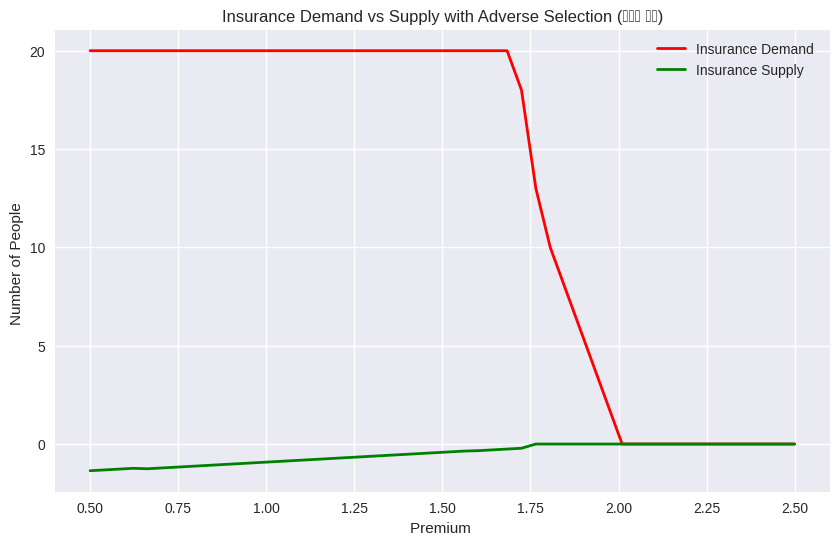

In [34]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

# 유틸리티 함수 정의 (위험 회피적인 성향을 반영)
def utility(x):
    return np.log(1 + x)  # 위험 회피적인 효용 함수

# 손실 확률 설정 및 정렬 (20개의 무작위 값 생성)
np.random.seed(42)  # 재현성을 위한 시드 설정
risk_levels = np.random.uniform(0, 1, 20)  # 0과 1 사이의 20개 값 생성
risk_levels = np.sort(risk_levels)

# 가장 높은 세 가지 확률 출력
print("The highest three probability of losses are {}".format(risk_levels[-3:]))

# 주요 변수 설정
income = 5    # 기본 소득 수준
premium_base = 1.2 # 초기 보험료
coverage = 2  # 보험 지급금 (보험 가입 시 제공되는 보상)
gamma = 0.4   # 효용 함수 매개변수

# 역선택을 반영한 보험 수요 함수 정의
def demand(premium):
    demand_levels = []
    for risk in risk_levels:
        # 보험 가입 시와 미가입 시의 기대 효용 비교
        expected_utility_with_insurance = risk * utility(income - premium) + (1 - risk) * utility(income)
        utility_without_insurance = utility(income - risk * coverage)

        # 보험 가입 의사 결정
        if expected_utility_with_insurance > utility_without_insurance:
            demand_levels.append(1)  # 가입함
        else:
            demand_levels.append(0)  # 가입하지 않음

    # 가입 의사가 있는 사람들의 총합을 수요로 표시
    return np.sum(demand_levels)

# 역선택을 반영한 보험 공급 함수 정의
def supply(premium):
    # 공급자는 보험에 가입한 사람들의 평균 손실 확률을 고려하여 공급
    insured_risk_levels = [risk for risk in risk_levels if risk * utility(income - premium) > utility(income - risk * coverage)]
    if len(insured_risk_levels) == 0:
        return 0
    expected_loss = np.mean(insured_risk_levels) * coverage
    return premium - expected_loss  # 보험료에서 예상 손실을 뺀 값이 공급의 기준

# 다양한 보험료에 따른 수요와 공급 분석
premiums = np.linspace(0.5, 2.5, 50)  # 보험료의 범위
demand_values = [demand(p) for p in premiums]
supply_values = [supply(p) for p in premiums]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(premiums, demand_values, label='Insurance Demand ', color='red', linewidth=2)
plt.plot(premiums, supply_values, label='Insurance Supply ', color='green', linewidth=2)

# 그래프 레이블 및 범위 설정
plt.title("Insurance Demand vs Supply with Adverse Selection (역선택 고려)")
plt.xlabel("Premium ")
plt.ylabel("Number of People ")
plt.legend()
plt.grid(True)
plt.show()



###경제학적 해석
* 역선택 현상: 이 그래프는 보험료가 높아짐에 따라 위험이 낮은 가입자들이 시장에서 이탈하는 전형적인 역선택 현상을 잘 나타내고 있습니다. 이는 결국 시장 전체의 비효율성과 균형점의 왜곡을 초래합니다.
* 보험사 입장: 공급 곡선이 미미하게 증가하는 이유는 보험사들이 위험을 평가하고 보험료를 책정하는 과정에서 정보 비대칭에 따른 손실을 보상하려고 하기 때문입니다.